In [97]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [2]:
# enhedsomraade 
cols = ['kategori','id','ny_dm_element','traeart','slaegtsnavn','planteaar','bydelsnavn','byrumstype','vejnavn','fritrumsprofil','stammeomfang','placering','omgivelse','reg_dato','opdateret_dato','wkb_geometry']
df = pd.read_csv('data/trae_basis.csv',sep=',',usecols=cols)
#drop_columns = ['FID','under_element','arbsted_tekst_id','plantet_halvaar','vaekstsaeson','underordnet_stednavn','omraade','kronediameter','vaekstmedie','beskyttelse','sundhed','skudtilsvaekst','andre_vaekstforhold','bevaringsvaerdi','driftstatus_gadetrae','garantiperioden_udloeber','vanding_i_aar','ejer','driftsorganisation','driftsorganisation_vanding','driftsaftale_edoc_nr','']
df.head()

,kategori,id,ny_dm_element,traeart,slaegtsnavn,planteaar,bydelsnavn,byrumstype,vejnavn,fritrumsprofil,stammeomfang,placering,omgivelse,reg_dato,opdateret_dato,wkb_geometry
0,gadetræ,2755,Gade- og allétræer,Platanus hybr. acerifolia,Platan,2008.0,Vanløse,Gader og pladser,Sallingvej,"4,5 m",40 - 60,Siderabat,Fast belægning,2011-07-01T00:00:00,2022-03-21T10:32:29.888,POINT (12.506472982261277 55.69325544860847)
1,gadetræ,79754,Gade- og allétræer,Tilia hybr. europaea 'Pallida',Lind,2005.0,Valby,Gader og pladser,Mølle Allé,"4,5 m",18 - 20,Fortov,Fast belægning,2016-04-07T09:47:27.171,2022-03-21T10:32:29.888,POINT (12.517024058234247 55.665248690540835)
2,gadetræ,84790,Gade- og allétræer,Tilia hybr. europaea 'Pallida',Lind,2018.0,Valby,Gader og pladser,Mølle Allé,"4,5 m",18 - 20,Fortov,Fast belægning,2018-01-08T00:00:00,2022-03-21T10:32:29.888,POINT (12.517473257630915 55.6651562247192)
3,gadetræ,79761,Formede træer,Tilia hybr. europaea 'Pallida',Lind,1960.0,Valby,Gader og pladser,Mølle Allé,"4,5 m",18 - 20,Fortov,Fast belægning,2016-04-07T09:47:27.171,2022-03-21T10:32:29.888,POINT (12.515573415316043 55.665570503006286)
4,gadetræ,6881,Gade- og allétræer,Robinia pseudoacacia 'Nyirsegi',Robinie,2008.0,Vesterbro-Kongens Enghave,Gader og pladser,Dannebrogsgade,"4,5 m",18 - 20,Fortov,Fast belægning,2011-07-01T00:00:00,2022-03-09T17:16:03.502,POINT (12.552988210062669 55.669186278185045)


(array([ 328.,   89.,  142.,   14.,  192.,   47.,   91.,  459.,  268.,
         224.,  404.,  101.,  333.,  280.,  489.,  147.,   99.,  754.,
        1764., 1140.,  814.,  406., 1536., 1655., 2317., 1891., 2072.,
        5332., 3839., 6701.]),
 array([1901.        , 1905.03333333, 1909.06666667, 1913.1       ,
        1917.13333333, 1921.16666667, 1925.2       , 1929.23333333,
        1933.26666667, 1937.3       , 1941.33333333, 1945.36666667,
        1949.4       , 1953.43333333, 1957.46666667, 1961.5       ,
        1965.53333333, 1969.56666667, 1973.6       , 1977.63333333,
        1981.66666667, 1985.7       , 1989.73333333, 1993.76666667,
        1997.8       , 2001.83333333, 2005.86666667, 2009.9       ,
        2013.93333333, 2017.96666667, 2022.        ]),
 <BarContainer object of 30 artists>)

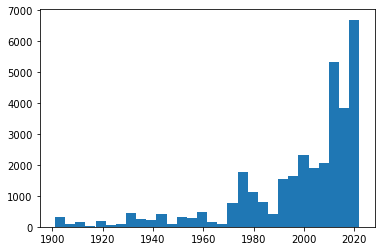

In [3]:
df = df[df["planteaar"] > 1900]
df = df.dropna(subset=['planteaar'])

plt.hist(df["planteaar"], bins = 30)

In [115]:
df["planteaar"]

array(['Gade- og allétræer', 'Formede træer', 'Park- og naturtræer',
       'Private træer', '0', 'Træer i bevoksninger'], dtype=object)

In [9]:
df["slaegtsnavn"].value_counts().sort_values(ascending = False)[1:15]

Lind               7303
Kirsebær/Blomme    2853
Eg                 2610
Platan             2433
Røn                2430
Løn                2410
Ask                2149
Robinie            1724
Æble               1375
Hestekastanie      1226
Birk               1192
Tjørn               942
Poppel              838
Avnbøg              827
Name: slaegtsnavn, dtype: int64

In [63]:
tree_sort = df["slaegtsnavn"].value_counts().sort_values(ascending = False)[1:11].index.to_list()
#tree_sort

In [50]:
table2 = pd.pivot_table(df, values='id', index=["planteaar"],
                    columns=['slaegtsnavn'], aggfunc="count")
#table2

In [54]:
table2 = table2[tree_sort]
table2

slaegtsnavn,Lind,Kirsebær/Blomme,Eg
planteaar,,,
0.0,0.0,0.0,0.0
1773.0,7.0,0.0,0.0
1850.0,7.0,0.0,0.0
1860.0,0.0,0.0,0.0
1870.0,0.0,0.0,0.0
...,...,...,...
2018.0,110.0,109.0,66.0
2019.0,151.0,163.0,179.0
2020.0,72.0,171.0,145.0


In [52]:
table2 = table2.fillna(0)

<AxesSubplot:xlabel='planteaar'>

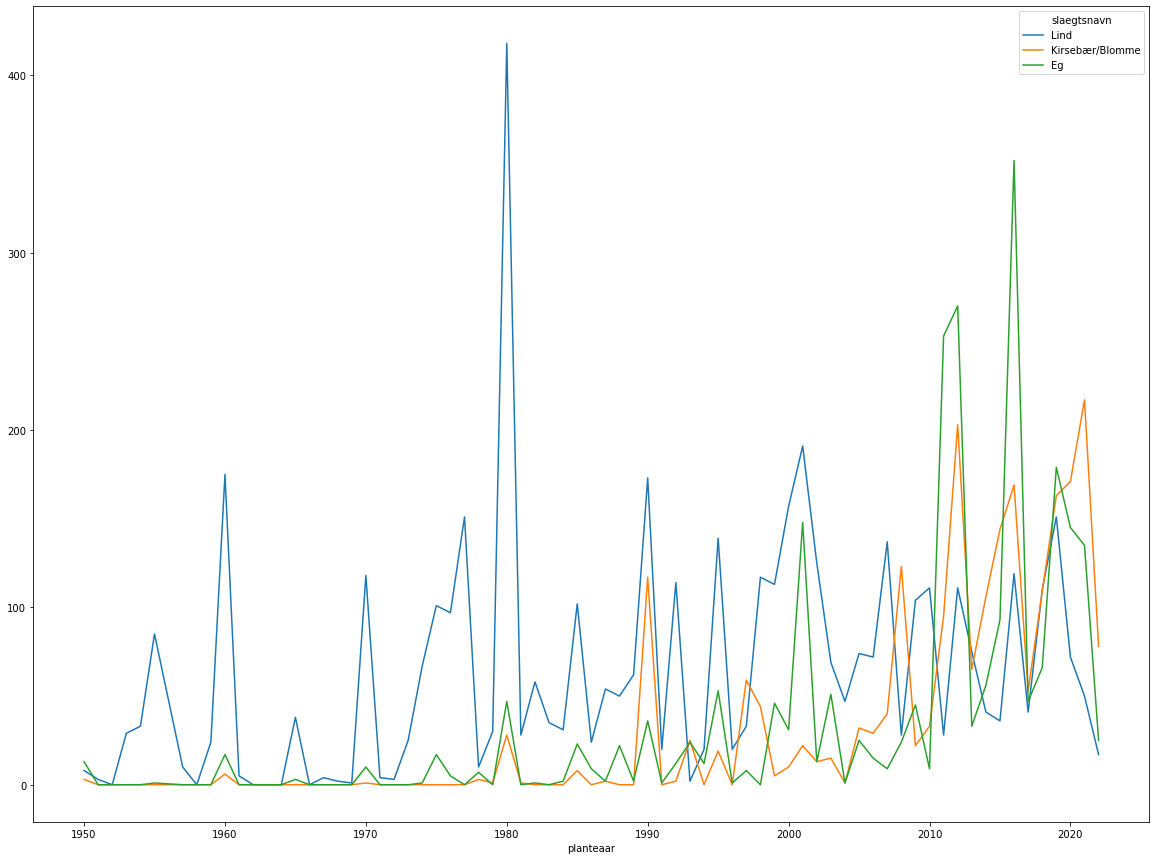

In [53]:
table2new = table2.loc[1950:]
table2new.plot(figsize=(20, 15))

In [64]:
bins=[1950,1955,1960,1965,1970,1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
df['planteaar_group'] = pd.cut(df['planteaar'],bins=bins)
table = pd.pivot_table(df, values='id', index=["planteaar_group"],
                    columns=['slaegtsnavn'], aggfunc="count")

In [65]:
table = table[tree_sort]
table

slaegtsnavn,Lind,Kirsebær/Blomme,Eg,Platan,Røn,Løn,Ask,Robinie,Æble,Hestekastanie
planteaar_group,,,,,,,,,,
"(1950, 1955]",150,0,1,10,0,22,3,7,23,2
"(1955, 1960]",209,6,17,6,23,64,11,5,0,76
"(1960, 1965]",43,0,3,0,0,16,29,5,0,6
"(1965, 1970]",125,1,10,67,22,152,9,5,0,79
"(1970, 1975]",200,0,18,192,51,352,207,30,6,25
"(1975, 1980]",706,32,59,124,349,112,264,66,1,76
"(1980, 1985]",254,9,26,52,55,59,83,11,19,19
"(1985, 1990]",363,119,71,93,79,146,264,19,17,36
"(1990, 1995]",295,46,102,186,209,391,70,115,4,14


<AxesSubplot:xlabel='planteaar_group'>

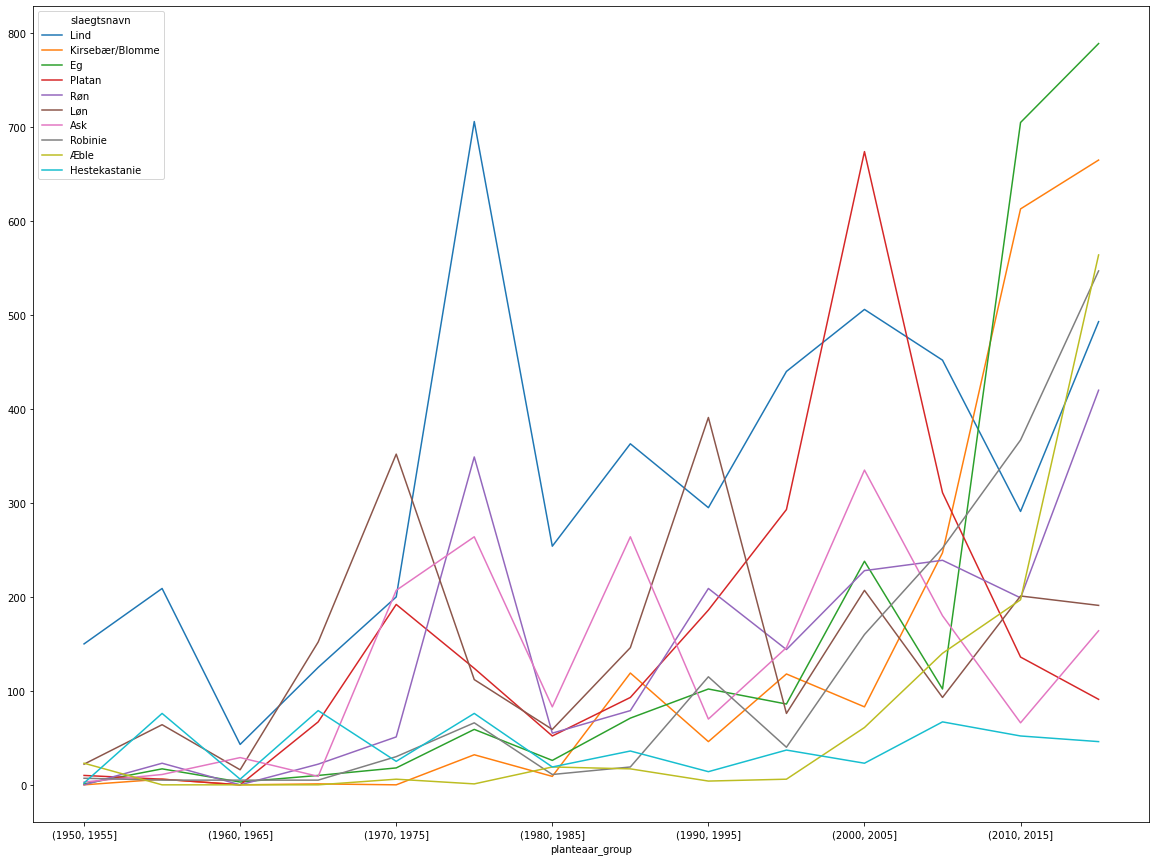

In [66]:
table.plot(figsize=(20, 15))

In [85]:
df1 = df.groupby(['slaegtsnavn']).size().reset_index(name='counts')
df1 = df1[df1["slaegtsnavn"].isin(tree_sort)]
df1

,slaegtsnavn,counts
5,Ask,2149
23,Eg,2610
35,Hestekastanie,1226
47,Kirsebær/Blomme,2853
54,Lind,7303
56,Løn,2410
67,Platan,2433
73,Robinie,1724
75,Røn,2430
104,Æble,1375


<AxesSubplot:xlabel='slaegtsnavn'>

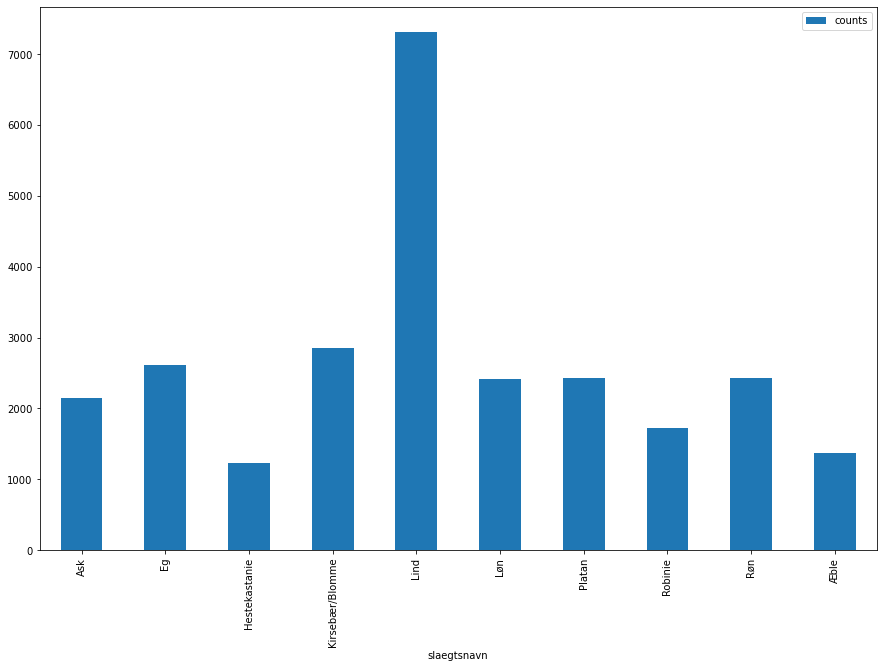

In [96]:
df1.plot.bar(x = "slaegtsnavn", figsize = (15,10))

In [ ]:
# 4.2: Heat map 
data = df[df['slaegtsnavn'] == 'Lind']
x_float = data['wkb_geometry'].astype(float)
y_float = data['Y'].astype(float)
data = data.drop(['X','Y'],axis=1)
data['X'] = x_float
data['Y'] = y_float 

# List comprehension 
heat_data = [[row['Y'],row['X']] for index, row in data.iterrows()]

# Plot it on the map
lat = 37.773972
lon = -122.431297
map = folium.Map(location=[lat, lon],zoom_start = 13)
HeatMap(heat_data,radius=15,blur=10).add_to(map)

# Show map 
map

In [99]:
df["wkb_geometry"][1:5]

1    POINT (12.517024058234247 55.665248690540835)
2      POINT (12.517473257630915 55.6651562247192)
3    POINT (12.515573415316043 55.665570503006286)
4    POINT (12.552988210062669 55.669186278185045)
Name: wkb_geometry, dtype: object

In [102]:
type(df["wkb_geometry"])

pandas.core.series.Series

In [114]:
import re

bo = re.findall(r"[-+]?\d*\.\d+|\d+", df["wkb_geometry"][0])
bo[0]

'12.506472982261277'